## Pokemon 數據處理

In [1]:
import os
import numpy as np
import pickle
from PIL import Image

In [2]:
pwd = os.getcwd() # 目前位置
os.chdir(pwd + '/pokemon')
lst = os.listdir() # 抓取檔案名稱儲存為list

In [3]:
data = np.zeros([1, 40, 40, 3], dtype=np.uint8)
for name in lst:
    pic = Image.open(name) # 讀取檔案 並轉換成 mode 'P'  8-bit 彩色
    if pic.mode == 'P':
        pic = pic.convert('RGBA') # 需要獲得"RGBA" 的第四層透明層 來做去背的效果
    else:
        pass
    arr = np.array(pic)
    ar = arr[:,:,3] == 0
    for i in range(3): # 去背 把 RGB 層 把沒有透明的部分全部設定為 255 -> 白色背景!! (分別設定 RGB 就能選定背景顏色)
        arr[:,:,i][ar] = 255
    arr = arr[:,:,0:3][np.newaxis, :, :, :] # 多創建一維來結合資料
    data = np.concatenate((data, arr)) # 資料結合
data = data[1: len(lst)+1] # 刪除第一全0項
os.chdir(pwd) # 回到原資料夾

In [4]:
c = data.shape[3]
n = 720
hn = 24
wn = n//hn
data = data[0:n,:,:,:]

In [5]:
data.resize(hn, wn, 40, 40, 3)
data = data.transpose(0, 2, 1, 3, 4)
data = data.reshape(hn*40, wn*40, 3)

dataP = Image.fromarray(data).convert('P') # 先做出Image
pokemon_palette = dataP.getpalette() # 取得RGB顏色索引(調色盤) list.size = 768(256 x 3), 256個顏色, 3個 "RGB"

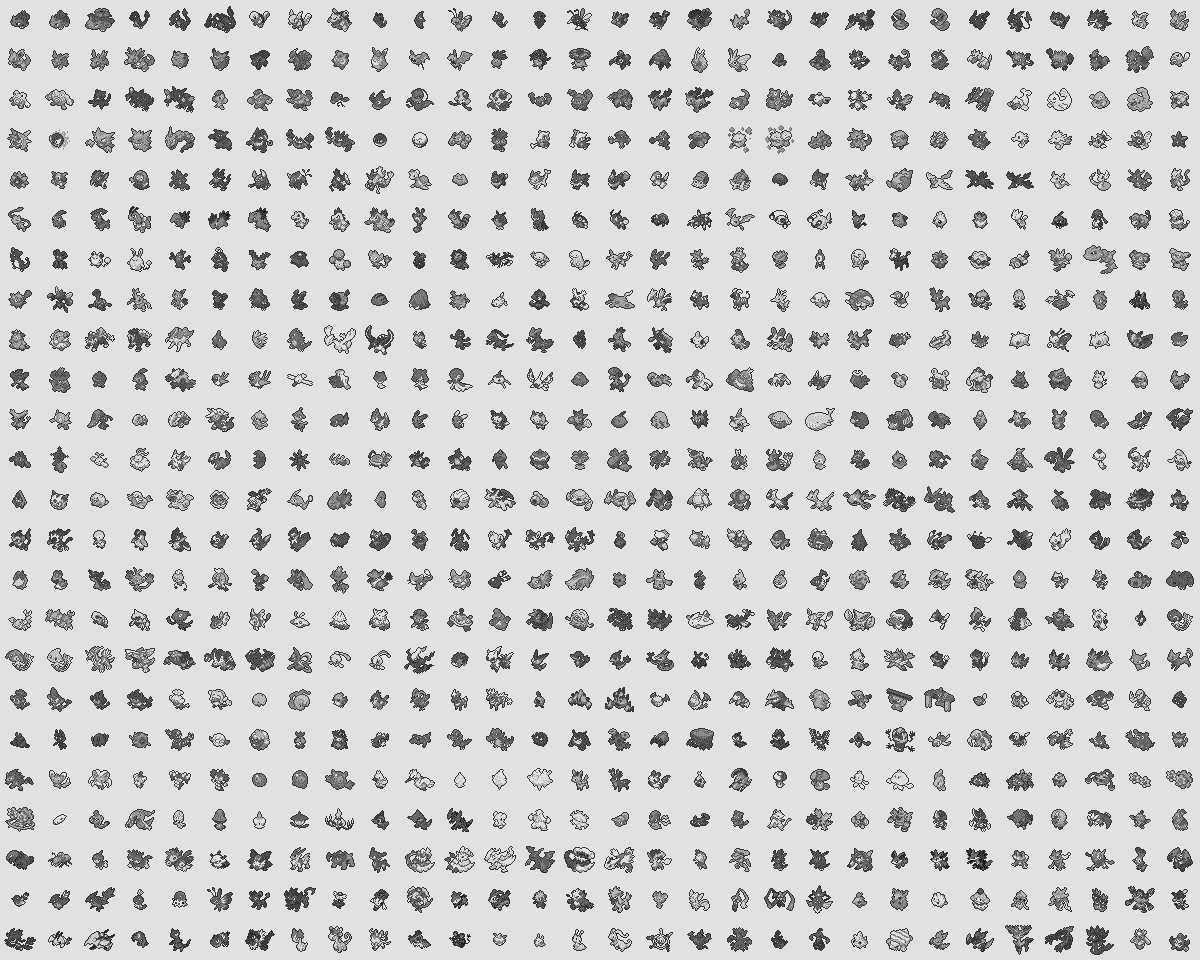

In [6]:
data = np.array(dataP)
picc = Image.fromarray(data, mode='P')
picc

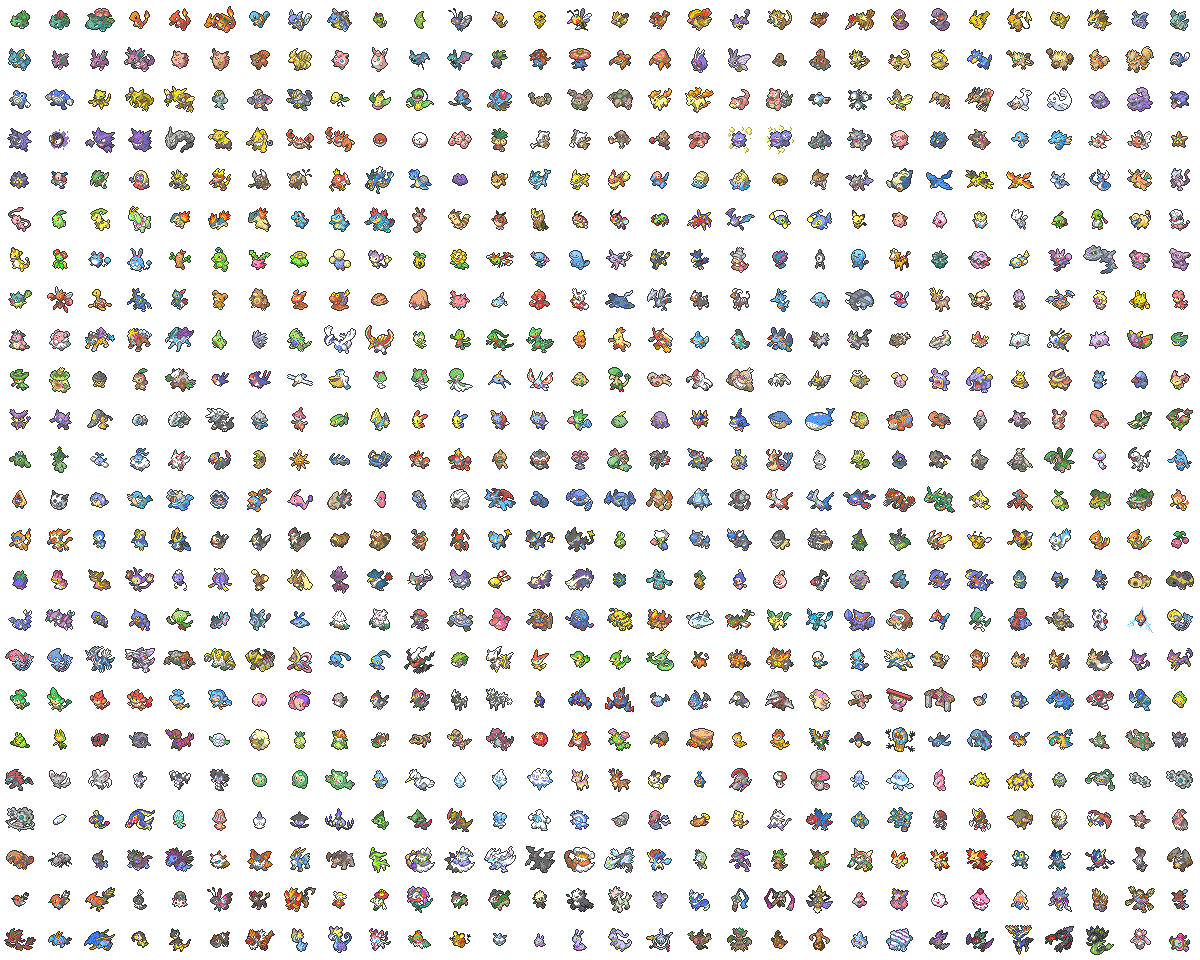

In [7]:
picc.putpalette(pokemon_palette) # 設定色塊索引(調色盤)
picc